<a href="https://colab.research.google.com/github/sdshaheer/Mini-project/blob/main/HANDWRITTEN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction 

For this project, the Hand_Written digit will be predicted. There are two datasets that will be needed to implement the project: 



Training dataset for which the DeepLearning model will be trained.
Testing dataset where the digit is predicted.
For this project we need to import necessary modules. As seen below we can get the training and testing datasets from mnist module. The MNIST database of handwritten digits has a training set of 60,000 examples, and a test set of 10,000 examples. 


Four files are available: 


train-images-idx3-ubyte.gz: training set images (9912422 bytes)  
train-labels-idx1-ubyte.gz: training set labels (28881 bytes)  
t10k-images-idx3-ubyte.gz: test set images (1648877 bytes)  
t10k-labels-idx1-ubyte.gz: test set labels (4542 bytes)  




---



In [ ]:
# Importing libraries

import tensorflow as tf
import numpy as np
from keras.datasets import mnist
from tensorflow.keras import *
from keras.layers import Conv2D,MaxPooling2D
import matplotlib.pyplot as plt
from keras.layers import Dense,Flatten,Dropout


### Loading mnist data.  

* There are a total of 60,000 images for training and 10,000 images for testing. The size of each image is "28x28"

In [ ]:
(x_train,y_train),(x_test,y_test)=mnist.load_data()

# print the number of images for training and tetsing
print(len(x_train),len(y_train))
print(len(x_test),len(y_test))

# print the shapes of images and their lables
print("shape of training data :",x_train.shape,y_train.shape)
print("shape of testing data :",x_test.shape,y_test.shape)

11501568/11490434 [==============================] - 0s 0us/step
60000 60000
10000 10000
shape of training data : (60000, 28, 28) (60000,)
shape of testing data : (10000, 28, 28) (10000,)


In [ ]:
# size of single image

x_train[0].shape

(28, 28)

## Plotting Images

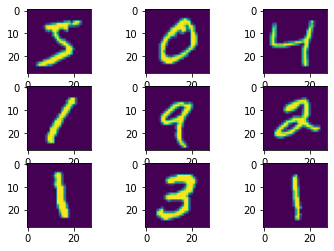

In [ ]:
for i in range(9):
	# define subplot
	plt.subplot(330+1+i)
	# plot raw pixel data
	plt.imshow(x_train[i])

In [ ]:
# Resizing the size of images

x_train=x_train.reshape(x_train.shape[0],28,28,1)
x_test=x_test.reshape(x_test.shape[0],28,28,1)


In [ ]:
print(f"Training set shape (Numerical features): {x_train.shape}")
print(f"Test set shape (Numerical features): {x_test.shape}")

Training set shape (Numerical features): (60000, 28, 28, 1)
Test set shape (Numerical features): (10000, 28, 28, 1)


## Normalizing Data

In [ ]:
# Normalizing data
def Normalize_data(data):
  data=data/255.0
  return data

x_train=Normalize_data(x_train)
x_test=Normalize_data(x_test)
x_train[0]

array([[[0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ]],

       [[0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        

## Defining DeepLearning model 


#### Types of Layers used in this model 


- Keras conv2D which stands for convolution layer in a 2-dimensional pattern is responsible for generating the kernel of convolution which is then amalgamated with the other input layers of the Keras model so that the final resultant output will contain a tensor. 

- MaxPooling2D is used to max pool the value from the given size matrix and same is used for the next 2 layers.

- Flatten is used to flatten the dimensions of the image obtained after convolving it.

- Dense is used to make this a fully connected model and is the hidden layer.

 
 
 
#### Activation functions

- Relu activation
ReLu Layer in Keras is used for applying the rectified linear unit activation function. ReLu activation function is computationally efficient hence it enables neural networks to converge faster during the training phase.  

- Softmax Activation
The softmax function is a function that turns a vector of K real values into a vector of K real values that sum to 1. The input values can be positive, negative, zero, or greater than one, but the softmax transforms them into values between 0 and 1, so that they can be interpreted as probabilities.  


In [ ]:
def create_model():
  model = tf.keras.models.Sequential([
                                      Conv2D(32,(2,2),input_shape=(28,28,1)),
                                      MaxPooling2D(pool_size=(2,2)),
                                      Conv2D(64,(2,2)),
                                      MaxPooling2D(pool_size=(2,2)),
                                      Flatten(), 
                                      Dense(256, activation='relu'),
                                      Dropout(0.25),
                                      Dense(128, activation='relu'),
                                      Dropout(0.5),
                                      Dense(10, activation='softmax')])
  return model

In [ ]:
def compile_model(model):
  model.compile(optimizer = 'adam',
                loss = 'sparse_categorical_crossentropy',
                metrics=['accuracy'])
  return model

In [ ]:
def fit_model(model):
  model.fit(x_train,y_train,epochs=15)
  return model


In [ ]:
created_model=create_model()
compiled_model=compile_model(created_model)
model=fit_model(compiled_model)

Epoch 1/15
1875/1875 [==============================] - 16s 3ms/step - loss: 0.2232 - accuracy: 0.9319
Epoch 2/15
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0786 - accuracy: 0.9767
Epoch 3/15
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0597 - accuracy: 0.9829
Epoch 4/15
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0493 - accuracy: 0.9858
Epoch 5/15
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0401 - accuracy: 0.9884
Epoch 6/15
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0376 - accuracy: 0.9888
Epoch 7/15
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0308 - accuracy: 0.9909
Epoch 8/15
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0304 - accuracy: 0.9910
Epoch 9/15
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0253 - accuracy: 0.9932
Epoch 10/15
1875/1875 [==============================] - 6s 3ms/step - loss: 0.02

### Summary

model.summary() to print a useful summary of the model, which includes:

* Name and type of all layers in the model.
* Output shape for each layer.
* Number of weight parameters of each layer.
* If the model has general topology (discussed below), the inputs each layer receives
* The total number of trainable and non-trainable parameters of the model.  

For the model we defined above, we get the following output on the console:

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 27, 27, 32)        160       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 12, 12, 64)        8256      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 2304)              0         
                                                                 
 dense (Dense)               (None, 256)               5

## Evaluating the Model

In [ ]:
model.evaluate(x_test,y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.0576 - accuracy: 0.9897


[0.05758673697710037, 0.9897000193595886]


## Saving the model

In [ ]:
model.save("model_hand.h5")

## Loading Model

In [ ]:
from keras import models
model=models.load_model("model_hand.h5")

In [ ]:
predict=model.predict([x_test])
predict

array([[6.9142494e-26, 1.0871722e-15, 7.1273366e-19, ..., 1.0000000e+00,
        1.3262022e-20, 4.1567487e-13],
       [1.1499543e-20, 1.7334902e-22, 1.0000000e+00, ..., 1.0745940e-27,
        1.3118400e-23, 2.0585244e-36],
       [4.0587781e-24, 1.0000000e+00, 4.0025386e-22, ..., 7.2420309e-20,
        3.1862884e-20, 3.6618923e-25],
       ...,
       [1.0337378e-28, 2.9455091e-20, 5.7750643e-19, ..., 1.3016382e-20,
        1.1620133e-15, 2.9508263e-14],
       [3.1967129e-18, 7.2311911e-25, 5.2931663e-29, ..., 4.1360522e-24,
        1.4829282e-14, 2.2035077e-15],
       [1.1722690e-19, 4.1903701e-22, 3.9893510e-23, ..., 8.2326819e-31,
        8.1632898e-23, 5.7932611e-29]], dtype=float32)

In [ ]:
# let's predict what is the digit in 16 place in x_test dataset
# our model predicted that it was 5

np.argmax(predict[15])

5

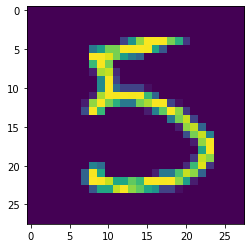

In [ ]:
test=x_test[15].reshape(28,28)
plt.imshow(test)

In [ ]:
test=x_test[0].reshape(-1,28,28,1)
pred=model.predict(test)
print(np.argmax(pred))
print(pred)


7
[[6.9141957e-26 1.0871681e-15 7.1272823e-19 9.6171897e-18 6.9971880e-20
  3.1753510e-23 6.8637228e-31 1.0000000e+00 1.3261971e-20 4.1567330e-13]]


In [ ]:

def predict_image(img):
  img_3d=img.reshape(-1,28,28)
  im_resize=img_3d/255.0
  prediction=model.predict(im_resize)
  pred=np.argmax(prediction)
  return pred

## Testing with GUI

In [ ]:
!pip install gradio


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 5.1 MB 36.1 MB/s 
     |████████████████████████████████| 1.1 MB 5.1 MB/s 
     |████████████████████████████████| 256 kB 34.6 MB/s 
     |████████████████████████████████| 2.0 MB 53.0 MB/s 
     |████████████████████████████████| 84 kB 3.7 MB/s 
     |████████████████████████████████| 212 kB 63.2 MB/s 
     |████████████████████████████████| 54 kB 4.1 MB/s 
     |████████████████████████████████| 140 kB 28.4 MB/s 
     |████████████████████████████████| 53 kB 3.1 MB/s 
     |████████████████████████████████| 144 kB 67.6 MB/s 
     |████████████████████████████████| 271 kB 67.8 MB/s 
     |████████████████████████████████| 94 kB 4.8 MB/s 
     |████████████████████████████████| 63 kB 2.5 MB/s 
     |████████████████████████████████| 80 kB 12.2 MB/s 
     |████████████████████████████████| 43 kB 2.9 MB/s 
     |████████████████████████████████| 62 kB

In [ ]:
import gradio as gr
iface = gr.Interface(predict_image, inputs="sketchpad", outputs="label")

In [ ]:
iface.launch(debug='True')




Colab notebook detected. This cell will run indefinitely so that you can see errors and logs. To turn off, set debug=False in launch().
Running on public URL: https://18153.gradio.app

This share link expires in 72 hours. For free permanent hosting, check out Spaces (https://huggingface.co/spaces)


In [ ]:
from google.colab import drive
drive.mount('/content/drive')